# Drug Comsumption Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 
        'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
        'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

In [3]:
#original data frame 
data = pd.read_csv("drug_consumption.data", names=names)
pd.set_option('display.max_columns', 100)
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


#### Personality Inventory Data
* Nscore (Real) is NEO-FFI-R Neuroticism
* Escore (Real) is NEO-FFI-R Extraversion
* Oscore (Real) is NEO-FFI-R Openness to experience
* Ascore (Real) is NEO-FFI-R Agreeableness
* Cscore (Real) is NEO-FFI-R Conscientiousness
* Impulsive (Real) is impulsiveness measured by BIS-11
* SS (Real) is sensation seeking measured by ImpSS
***
#### Notation Originally Used in All Drug Columns 
* CL0 Never Used 
* CL1 Used over a Decade Ago 
* CL2 Used in Last Decade 
* CL3 Used in Last Year 
* CL4 Used in Last Month 
* CL5 Used in Last Week 
* CL6 Used in Last Day 

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

In [5]:
def heatmap_corr(dataframe):
    # Plots a heatmap of correlation 
    fig, ax = plt.subplots(figsize=(15,15))
    mask=np.zeros_like(dataframe.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    color_map = sns.color_palette("RdBu")
    ax = sns.heatmap(dataframe.corr(), cmap = color_map, mask=mask, square=True, annot=True)
    plt.title('Correlation Matrix')

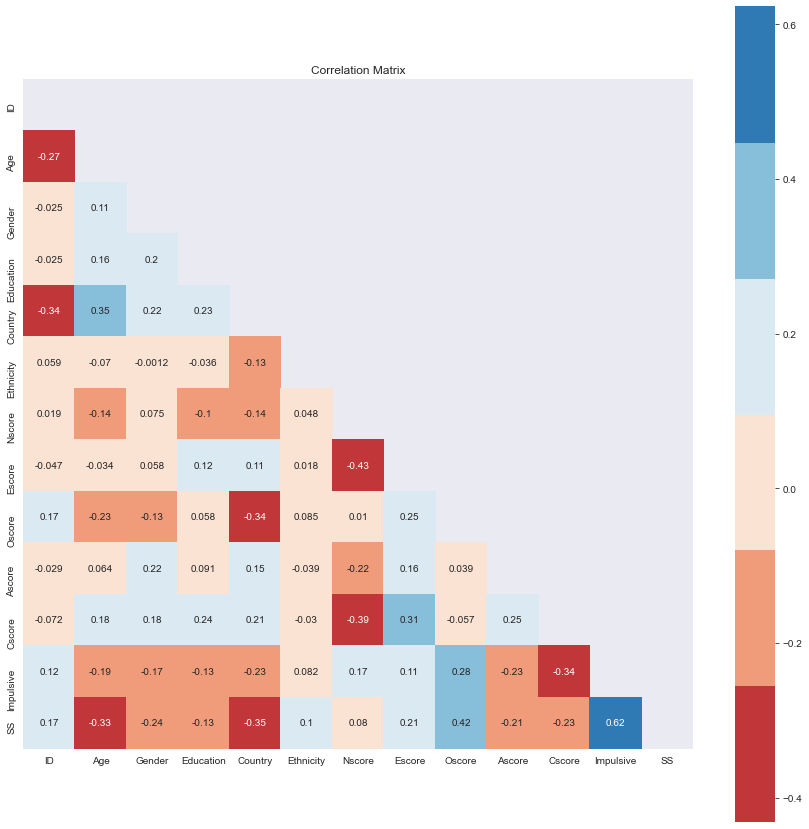

In [6]:
heatmap_corr(data)

In [7]:
#cleaned data frame 
df = pd.read_csv("dataframe_final_3.csv")

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Drug_Use,EDU_18,EDU_Some_college,EDU_Cert,EDU_Uni,EDU_Mas,EDU_Doc,Age25_34,Age35_44,Age45_54,Age55_64,Age65_,Gender
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [9]:
#Drug_Use = 1 if used Amphet, Benzos, Coke, Crack , Ecstasy or Heroin in the last decade othewise 0
#Alcohol and Cannabis were made binary, 1 if used with in the last month otherwise 0
#Gender was made binary 1 = male, 0 = female
#Education and age were binned and dummied 

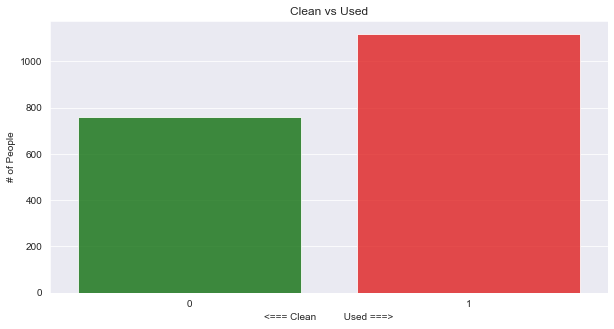

Drug_Use
0     759
1    1118
Name: Drug_Use, dtype: int64


In [10]:
plt.figure(figsize = (10,5))
sns.countplot(df['Drug_Use'], alpha =.80, palette= ['green', 'red'])
plt.title('Clean vs Used')
plt.ylabel('# of People')
plt.xlabel('<=== Clean          Used ===>')
plt.show()

print(df.groupby(['Drug_Use']).Drug_Use.count())

In [11]:
personality_df = data[['Nscore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
personality_df.head()

,Nscore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.31287,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.67825,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,-0.46725,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.14882,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.73545,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


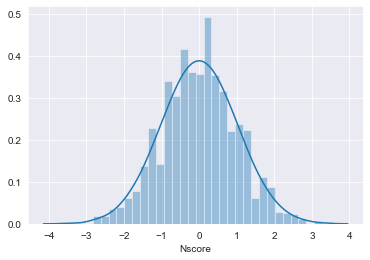

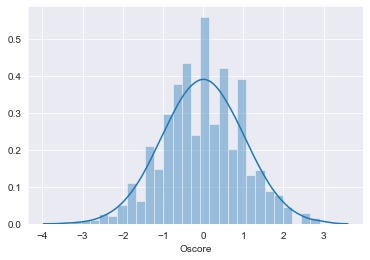

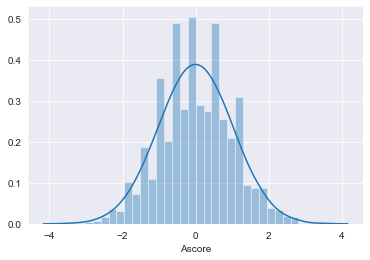

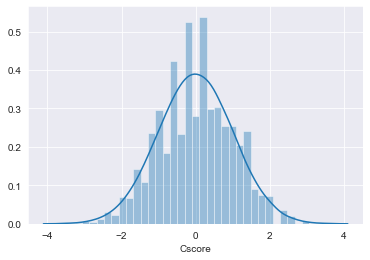

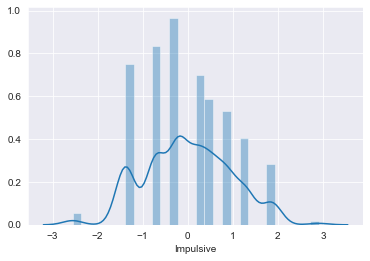

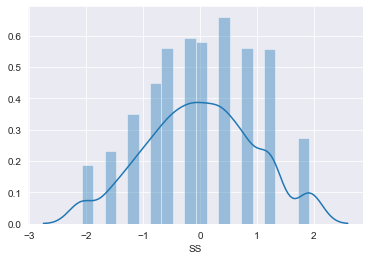

In [12]:
#personality data was normalized in the orignal data frame 
for columns in personality_df:
    sns.distplot(personality_df[columns])
    plt.show()

In [13]:
#checking data types 
df.dtypes

Nscore              float64
Escore              float64
Oscore              float64
Ascore              float64
Cscore              float64
Impulsive           float64
SS                  float64
Alcohol               int64
Amphet                int64
Benzos                int64
Cannabis              int64
Coke                  int64
Crack                 int64
Ecstasy               int64
Heroin                int64
Ketamine              int64
Drug_Use              int64
EDU_18                int64
EDU_Some_college      int64
EDU_Cert              int64
EDU_Uni               int64
EDU_Mas               int64
EDU_Doc               int64
Age25_34              int64
Age35_44              int64
Age45_54              int64
Age55_64              int64
Age65_                int64
Gender                int64
dtype: object

In [14]:
#checking for null values 
df.isna().sum()

Nscore              0
Escore              0
Oscore              0
Ascore              0
Cscore              0
Impulsive           0
SS                  0
Alcohol             0
Amphet              0
Benzos              0
Cannabis            0
Coke                0
Crack               0
Ecstasy             0
Heroin              0
Ketamine            0
Drug_Use            0
EDU_18              0
EDU_Some_college    0
EDU_Cert            0
EDU_Uni             0
EDU_Mas             0
EDU_Doc             0
Age25_34            0
Age35_44            0
Age45_54            0
Age55_64            0
Age65_              0
Gender              0
dtype: int64

## Models 

In [15]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import f_regression,mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import itertools

In [16]:
df.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Drug_Use,EDU_18,EDU_Some_college,EDU_Cert,EDU_Uni,EDU_Mas,EDU_Doc,Age25_34,Age35_44,Age45_54,Age55_64,Age65_,Gender
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [17]:
#split 
X = df.drop(['Drug_Use', 'Ketamine', 'Amphet', 'Benzos', 'Coke', 'Crack', 'Ecstasy', 'Heroin'], axis=1)
y = df.Drug_Use

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.25) 

In [19]:
#scale
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [20]:
len(y_train), len(y_test)

(1407, 470)

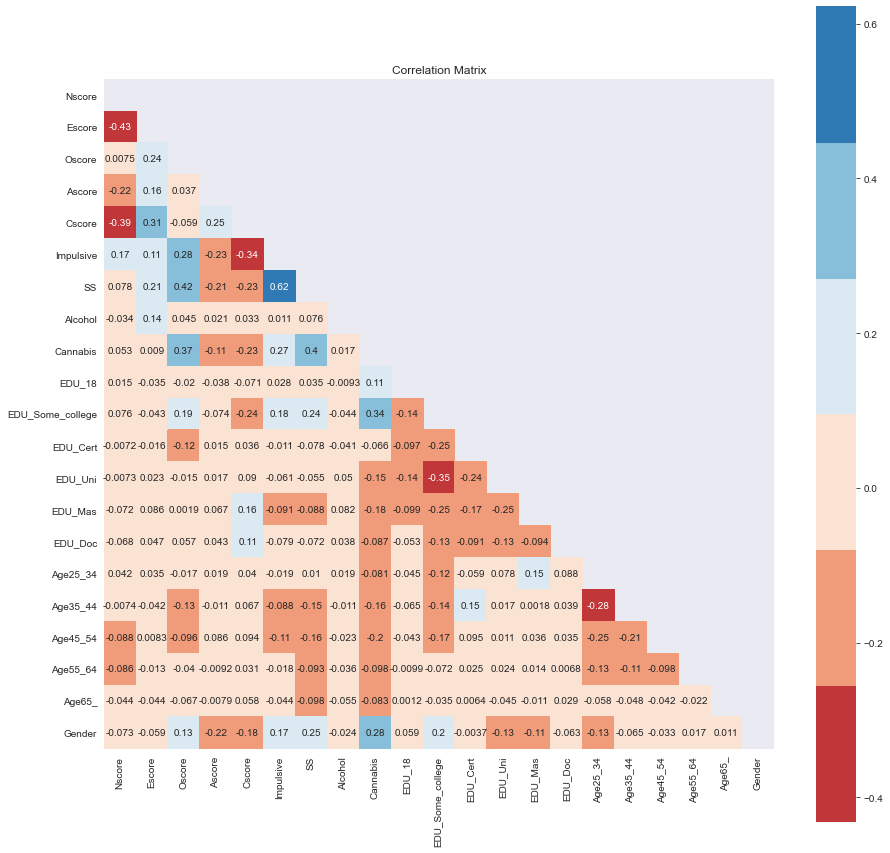

In [21]:
heatmap_corr(X)

## Logistic Regression 

In [22]:
# Logistic regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial')
lr.fit(X_test, y_test)
y_pred_lr = lr.predict(X_test)

def print_report(y_test, y_pred):

    print('LOGISTIC REGRESSION')
    print('--'*40)
    print('Confusion Matrix')
    print('--'*40)
    print(confusion_matrix(y_test, y_pred))
    print('--'*40)
    print('Classification Report')
    print('--'*40)
    print(classification_report(y_test, y_pred, output_dict= False))
    print('--'*40)
    p0t2= round(f1_score(y_test, y_pred), 3)
    print(f'F1 score: {p0t2}')

print_report(y_test, y_pred_lr)

LOGISTIC REGRESSION
--------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------
[[153  50]
 [ 56 211]]
--------------------------------------------------------------------------------
Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       203
           1       0.81      0.79      0.80       267

    accuracy                           0.77       470
   macro avg       0.77      0.77      0.77       470
weighted avg       0.78      0.77      0.77       470

--------------------------------------------------------------------------------
F1 score: 0.799


Confusion Matrix, without normalization
[[153  50]
 [ 56 211]]


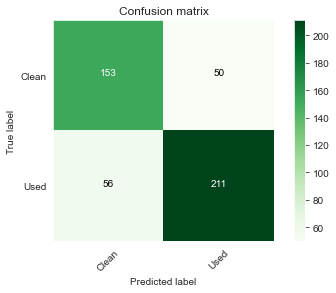

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lr)
classes = ['Clean', 'Used']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

### Log Reg Grid Search

In [24]:
# instantiate a model
logreg= LogisticRegression(solver= 'saga')

# create parameters to test
parameters= {'penalty': ['l1', 'l2', 'none'],
             'C': [0.25, 0.5, 0.75],
            }
#
grid_logreg= GridSearchCV(logreg, param_grid= parameters, cv=5, scoring='f1')

#
grid_logreg= grid_logreg.fit(X_train,y_train)

#
print(grid_logreg.best_score_)

#
print(grid_logreg.best_params_)

#
print(grid_logreg.best_estimator_)

#Predict the response for test dataset
y_pred = grid_logreg.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1_score:", f1_score(y_test, y_pred))

C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalt

0.8112764676963661
{'C': 0.25, 'penalty': 'l1'}
LogisticRegression(C=0.25, penalty='l1', solver='saga')
F1_score: 0.776173285198556


C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


## Random Forest 

In [25]:
rfc = RandomForestClassifier(random_state = 23)
rfc

RandomForestClassifier(random_state=23)

In [26]:
#fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=23)

In [27]:
#use the fitted model to predict on the test data
rfc_pred = rfc.predict(X_test)

# checking accuracy on the test data
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))

# checking accuracy on the test data
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.7553191489361702
Test F1 score:  0.7920433996383364


### Random Forest Grid Search

In [28]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [29]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [30]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [31]:
rfc1=RandomForestClassifier(random_state=23, 
                            max_features='auto',
                            n_estimators= 200, 
                            max_depth=7, 
                            criterion='entropy')

In [32]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200,
                       random_state=23)

In [33]:
pred=rfc1.predict(X_test)

In [34]:
#Accuracy and F1 score for CV data
print("Accuracy: ",accuracy_score(y_test,pred))

print("F1 Score: ", f1_score(y_test,pred))

Accuracy:  0.7553191489361702
F1 Score:  0.7957371225577264


## KNN 

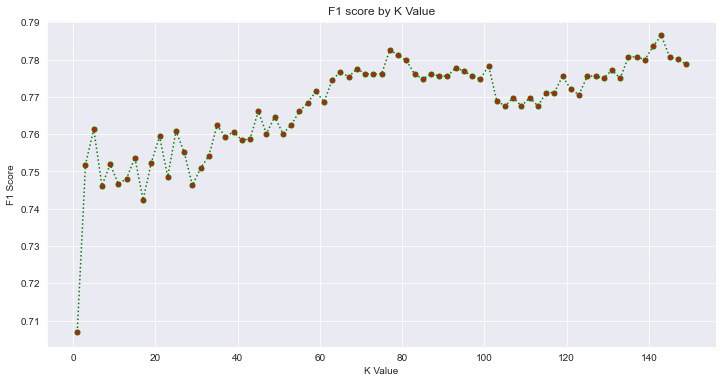

F1_score max:0.7865 where K: 143


In [35]:
k_scores = []
k_range= list(range(1, 150, 2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p=2)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    k_scores.append(f1_score(y_test, y_pred_k, pos_label= 1))

# plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='green', linestyle=':', marker='o',  
         markerfacecolor='red', markersize=5)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# display parametrs 
print(f'F1_score max:{round(max(k_scores), 4)} where K: {(k_scores.index(max(k_scores))+1)*2 - 1}')
k= (k_scores.index(max(k_scores))+1)*2 - 1

In [36]:
y_pred_class = knn.predict(X_test)
accuracy_score(y_test, y_pred_class, normalize=True, sample_weight=None)

0.7340425531914894

Confusion Matrix, without normalization
[[125  78]
 [ 47 220]]


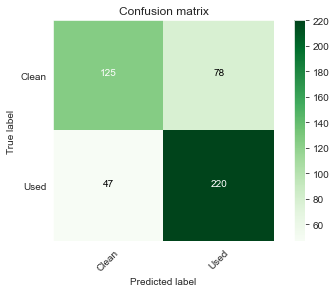

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Clean', 'Used']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

### KNN Grid Search 

In [38]:
# instantiate a model
knn= KNeighborsClassifier()

# create parameters to test
parameters= {'n_neighbors': range(1, 200, 2),
             'p': range(1, 3)
            }
#
grid_knn= GridSearchCV(estimator= knn, param_grid= parameters, cv=5, scoring='f1')

#
grid_knn= grid_knn.fit(X_train,y_train)

#
print(grid_knn.best_score_)

# 
print(grid_knn.best_params_)

# 
print(grid_knn.best_estimator_)

#
y_pred = grid_knn.best_estimator_.predict(X_test)

#
print("F1_score:", f1_score(y_test, y_pred))

0.8205929963282905
{'n_neighbors': 147, 'p': 1}
KNeighborsClassifier(n_neighbors=147, p=1)
F1_score: 0.7827648114901257


## XGBoost 

In [39]:
xgb.XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [40]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           learning_rate = 0.1,
                           max_depth = 2, 
                           alpha = 1, 
                           n_estimators = 100)

In [41]:
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
preds = xg_clf.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.751064
F1: 0.789189


### XGBoost Grid Search

In [43]:
xgb_model = xgb.XGBClassifier()

In [44]:
parameters = {'nthread':[1, 2, 3, 4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.05], 
              'max_depth': [5, 6, 7, 8],
              'n_estimators': [1000]
              }

In [45]:
CV_xgb = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv= 5)
CV_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [46]:
CV_xgb.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'n_estimators': 1000,
 'nthread': 1,
 'objective': 'binary:logistic'}

In [47]:
xgb_1 = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           learning_rate = 0.5,
                           max_depth = 8, 
                           alpha = 1, 
                           n_estimators = 1000,
                           nthread= 1)

In [48]:
xgb_1.fit(X_train,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=1, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [49]:
preds2 = xgb_1.predict(X_test)

test_f1 = f1_score(y_test, preds2)
test_acc = accuracy_score(y_test, preds2)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.731915
F1: 0.774194


### Polynomial Features 

In [50]:
#polynomial features added personality data only 
poly_df = pd.read_csv("poly_2df.csv")
poly_df.drop(['Unnamed: 0'], axis=1, inplace = True)
poly_df.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Nscore^2,Nscore Escore,Nscore Oscore,Nscore Ascore,Nscore Cscore,Nscore Impulsive,Nscore SS,Escore^2,Escore Oscore,Escore Ascore,Escore Cscore,Escore Impulsive,Escore SS,Oscore^2,Oscore Ascore,Oscore Cscore,Oscore Impulsive,Oscore SS,Ascore^2,Ascore Cscore,Ascore Impulsive,Ascore SS,Cscore^2,Cscore Impulsive,Cscore SS,Impulsive^2,Impulsive SS,SS^2,Alcohol,Cannabis,EDU_18,EDU_Some_college,EDU_Cert,EDU_Uni,EDU_Mas,EDU_Doc,EDU_Doc.1,Age25_34,Age35_44,Age45_54,Age55_64,Age65_,Gender
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0.097888,-0.180041,-0.182500,-0.286899,-0.002081,-0.067930,-0.369449,0.331143,0.335666,0.527682,0.003827,0.124942,0.679514,0.340251,0.534889,0.003879,0.126648,0.688796,0.840871,0.006098,0.199097,1.082818,0.000044,0.001444,0.007853,0.047141,0.256384,1.394383,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0.460023,-1.315032,-0.973513,-0.516121,0.096834,0.482412,0.146332,3.759178,2.782904,1.475395,-0.276811,-1.379034,-0.418309,2.060172,1.092229,-0.204922,-1.020893,-0.309672,0.579060,-0.108642,-0.541240,-0.164177,0.020383,0.101547,0.030803,0.505891,0.153454,0.046548,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0.218323,-0.376244,0.395910,0.757366,0.474025,0.644726,-0.187592,0.648395,-0.682287,-1.305197,-0.816906,-1.111081,0.323284,0.717951,1.373421,0.859606,1.169158,-0.340182,2.627317,1.644403,2.236566,-0.650759,1.029210,1.399838,-0.407301,1.903931,-0.553974,0.161186,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0.022147,0.119971,0.002869,-0.087866,-0.087043,0.205346,0.175733,0.649878,0.015543,-0.475967,-0.471509,1.112350,0.951934,0.000372,-0.011383,-0.011277,0.026603,0.022767,0.348596,0.345331,-0.814679,-0.697192,0.342096,-0.807049,-0.690662,1.903931,1.629358,1.394383,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0.540887,-1.201284,-0.332232,-0.221900,0.960586,-0.159681,-0.158673,2.667996,0.737872,0.492829,-2.133416,0.354644,0.352406,0.204069,0.136299,-0.590027,0.098082,0.097463,0.091035,-0.394083,0.065509,0.065096,1.705949,-0.283585,-0.281795,0.047141,0.046844,0.046548,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0


In [51]:
(poly_df.corr() > .95).sum()

Nscore              1
Escore              1
Oscore              1
Ascore              1
Cscore              1
Impulsive           1
SS                  1
Nscore^2            1
Nscore Escore       1
Nscore Oscore       1
Nscore Ascore       1
Nscore Cscore       1
Nscore Impulsive    1
Nscore SS           1
Escore^2            1
Escore Oscore       1
Escore Ascore       1
Escore Cscore       1
Escore Impulsive    1
Escore SS           1
Oscore^2            1
Oscore Ascore       1
Oscore Cscore       1
Oscore Impulsive    1
Oscore SS           1
Ascore^2            1
Ascore Cscore       1
Ascore Impulsive    1
Ascore SS           1
Cscore^2            1
Cscore Impulsive    1
Cscore SS           1
Impulsive^2         1
Impulsive SS        1
SS^2                1
Alcohol             1
Cannabis            1
EDU_18              1
EDU_Some_college    1
EDU_Cert            1
EDU_Uni             1
EDU_Mas             1
EDU_Doc             2
EDU_Doc.1           2
Age25_34            1
Age35_44  

In [52]:
X = poly_df.drop(['EDU_Doc'], axis=1)
y = df.Drug_Use

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.25) 

In [54]:
#scale
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [55]:
# instantiate a model
logreg= LogisticRegression(solver= 'saga')

# create parameters to test
parameters= {'penalty': ['l1', 'l2', 'none'],
             'C': [0.25, 0.5, 0.75],
            }
#
grid_logreg= GridSearchCV(logreg, param_grid= parameters, cv=5, scoring='f1')

#
grid_logreg= grid_logreg.fit(X_train,y_train)

#
print(grid_logreg.best_score_)

#
print(grid_logreg.best_params_)

#
print(grid_logreg.best_estimator_)

#Predict the response for test dataset
y_pred = grid_logreg.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1_score:", f1_score(y_test, y_pred))

C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Royce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalt

0.8087275835392076
{'C': 0.25, 'penalty': 'l1'}
LogisticRegression(C=0.25, penalty='l1', solver='saga')
F1_score: 0.7832422586520947


In [56]:
rfc1=RandomForestClassifier(random_state=23, 
                            max_features='auto',
                            n_estimators= 200, 
                            max_depth=7, 
                            criterion='entropy')

rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,pred))

print("F1 Score: ", f1_score(y_test,pred))

Accuracy:  0.7531914893617021
F1 Score:  0.7979094076655052


In [57]:
# instantiate a model
knn= KNeighborsClassifier()

# create parameters to test
parameters= {'n_neighbors': range(1, 200, 2),
             'p': range(1, 3)
            }
#
grid_knn= GridSearchCV(estimator= knn, param_grid= parameters, cv=5, scoring='f1')

#
grid_knn= grid_knn.fit(X_train,y_train)

#
print(grid_knn.best_score_)

# 
print(grid_knn.best_params_)

# 
print(grid_knn.best_estimator_)

#
y_pred = grid_knn.best_estimator_.predict(X_test)

#
print("F1_score:", f1_score(y_test, y_pred))

0.8234180064435874
{'n_neighbors': 75, 'p': 1}
KNeighborsClassifier(n_neighbors=75, p=1)
F1_score: 0.7793103448275861


In [58]:
xgb.XGBClassifier()
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           learning_rate = 0.1,
                           max_depth = 2, 
                           alpha = 1, 
                           n_estimators = 100)
xg_clf.fit(X_train,y_train)
preds = xg_clf.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))


Accuracy: 0.744681
F1: 0.779412


In [59]:
result = [["Logistic Regression", 0.78, 0.74],
 ["Random Forest", 0.79, 0.74],
 ["XGBoost", 0.79, 0.73],
 ["KNN", 0.82, 0.77]]

x-axis:
 0 - Logistic Regression
 1 - Random Forest
 3 - XGBoost
 4 - KNN


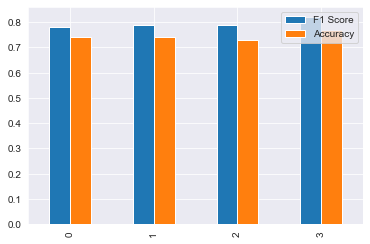

In [60]:
df = pd.DataFrame(result, columns = ['Methods', 'F1 Score', 'Accuracy'] )
df.plot.bar()
print("x-axis:\n 0 - Logistic Regression\n 1 - Random Forest\n 3 - XGBoost\n 4 - KNN")

In [61]:
from tabulate import tabulate
table = tabulate(result, headers=['Methods', 'F1 Score', 'Accuracy'], tablefmt='orgtbl')
print(table)

| Methods             |   F1 Score |   Accuracy |
|---------------------+------------+------------|
| Logistic Regression |       0.78 |       0.74 |
| Random Forest       |       0.79 |       0.74 |
| XGBoost             |       0.79 |       0.73 |
| KNN                 |       0.82 |       0.77 |
